Scraping: https://www.amazon.in/Originals-Crime-Punishment-Fyodor-Dostoevsky/dp/9352763165/
Scraping: https://www.amazon.in/Pride-Prejudice-Jane-Austen/dp/8172345192/
Scraping: https://www.amazon.in/To-Kill-Mockingbird-Harper-Lee/dp/0099549484/
Scraping: https://www.amazon.in/Catcher-Rye-J-D-Salinger/dp/0241950422/
Scraping: https://www.amazon.in/Atomic-Habits-James-Clear/dp/1847941834/
Scraping: https://www.amazon.in/Psychology-Money-Morgan-Housel/dp/9390166268/
Scraping: https://www.amazon.in/Rich-Dad-Poor-Robert-Kiyosaki/dp/1612680194/
Scraping: https://www.amazon.in/Subtle-Art-Not-Giving/dp/0062641549/
Scraping: https://www.amazon.in/Ikigai-Hector-Garcia/dp/178633089X/
Scraping: https://www.amazon.in/Harry-Potter-Philosophers-Stone/dp/1408855658/
Scraping: https://www.amazon.in/Hobbit-J-R-Tolkien/dp/0261103342/
Scraping: https://www.amazon.in/Alchemist-Paulo-Coelho/dp/8172234988/
Scraping: https://www.amazon.in/1984-George-Orwell/dp/8172345788/
Scraping: https://www.amazon.in/Brave

,url,error
1,https://www.amazon.in/Pride-Prejudice-Jane-Aus...,HTTP 404
6,https://www.amazon.in/Rich-Dad-Poor-Robert-Kiy...,HTTP 404
12,https://www.amazon.in/1984-George-Orwell/dp/81...,HTTP 404



✅ Scraped DataFrame:



,title,asin,price,price_raw,rating,total_reviews,availability,url
0,The Originals: Crime and Punishment by Fyodor ...,9352763165,214.0,214,4.6,1788.0,In stock,https://www.amazon.in/Originals-Crime-Punishme...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.amazon.in/Pride-Prejudice-Jane-Aus...
2,To Kill A Mockingbird: 60th (L),0099549484,318.0,318,4.5,135354.0,In stock,https://www.amazon.in/To-Kill-Mockingbird-Harp...
3,Catcher In The Rye (L) (Re-Issue),0241950422,318.0,318,4.2,42438.0,In stock,https://www.amazon.in/Catcher-Rye-J-D-Salinger...
4,Atomic Habits: The life-changing million copy ...,1847941834,495.0,495.,4.6,107011.0,In stock,https://www.amazon.in/Atomic-Habits-James-Clea...
5,The Psychology of Money,9390166268,290.0,290,4.6,76159.0,In stock,https://www.amazon.in/Psychology-Money-Morgan-...
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.amazon.in/Rich-Dad-Poor-Robert-Kiy...
7,The Subtle Art of Not Giving a F*ck : A Counte...,0062641549,351.0,351,4.5,153778.0,In stock,https://www.amazon.in/Subtle-Art-Not-Giving/dp...
8,Ikigai: The Japanese Secret to a Long and Happ...,178633089X,368.0,368,4.6,60137.0,In stock,https://www.amazon.in/Ikigai-Hector-Garcia/dp/...
9,Harry Potter and the Philosopher's Stone,1408855658,375.0,375,4.7,131308.0,In stock,https://www.amazon.in/Harry-Potter-Philosopher...



💾 Saved results to amazon_products.csv


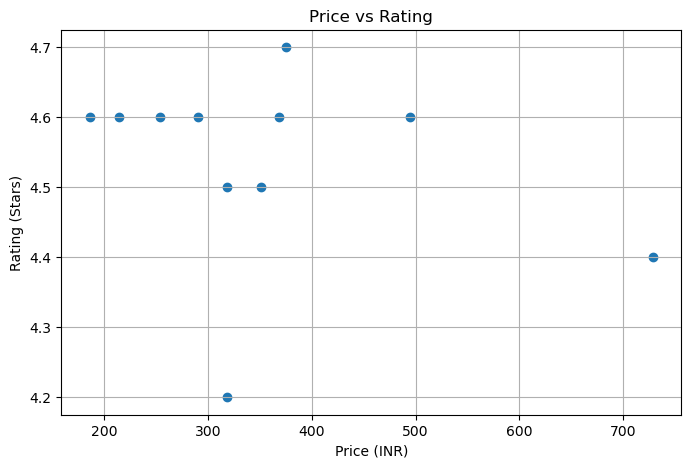

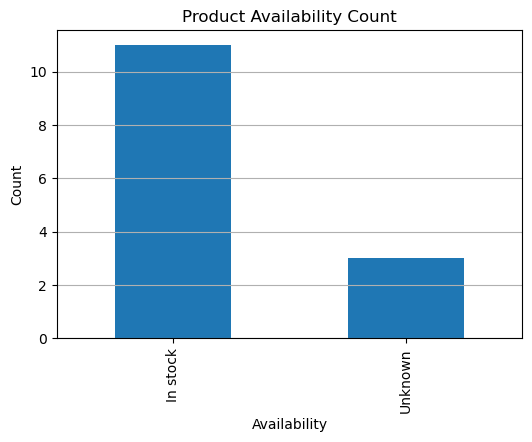


✅ Notebook complete. Add more URLs to the list to scrape more products.


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import re
import matplotlib.pyplot as plt
from IPython.display import display

# --- Rotating User-Agents ---
USER_AGENTS = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/141.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.1 Safari/605.1.15",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36"
]

HEADERS_BASE = {"Accept-Language": "en-US,en;q=0.9"}

def get_headers():
    """Return random header for each request"""
    h = HEADERS_BASE.copy()
    h["User-Agent"] = random.choice(USER_AGENTS)
    return h

def clean_text(x):
    """Remove extra spaces and newlines"""
    if not x:
        return None
    return re.sub(r'\s+', ' ', x).strip()

def parse_price(price_str):
    """Convert price string like ₹249.00 to float"""
    if not price_str:
        return None
    p = re.sub(r'[^0-9.,]', '', price_str).replace(',', '')
    try:
        return float(p)
    except:
        return None

# --- Scraper Function ---
def scrape_amazon_product(url, session=None, pause_range=(1.0, 2.5)):
    """
    Scrape product details from a single Amazon product URL.
    Returns a dictionary of fields.
    """
    if session is None:
        session = requests.Session()
    try:
        resp = session.get(url, headers=get_headers(), timeout=15)
    except Exception as e:
        return {"error": f"Request failed: {e}", "url": url}

    if resp.status_code != 200:
        return {"error": f"HTTP {resp.status_code}", "url": url}

    soup = BeautifulSoup(resp.content, "html.parser")

    # Title
    title_tag = soup.find("span", {"id": "productTitle"})
    title = clean_text(title_tag.get_text()) if title_tag else None

    # Price
    price = None
    selectors = [
        ("span", {"id": "priceblock_ourprice"}),
        ("span", {"id": "priceblock_dealprice"}),
        ("span", {"class": "a-price-whole"}),
        ("span", {"class": "a-offscreen"}),
    ]
    for tag, attrs in selectors:
        t = soup.find(tag, attrs=attrs)
        if t and t.get_text(strip=True):
            price = t.get_text(strip=True)
            break
    price_value = parse_price(price)

    # Rating
    rating = None
    rating_tag = soup.find("span", {"class": "a-icon-alt"})
    if rating_tag:
        rating_text = rating_tag.get_text(strip=True)
        m = re.search(r'([0-9]+(?:\.[0-9]+)?)', rating_text)
        if m:
            try:
                rating = float(m.group(1))
            except:
                rating = None

    # Total Reviews
    total_reviews = None
    review_tag = soup.find("span", {"id": "acrCustomerReviewText"})
    if review_tag:
        s = review_tag.get_text(strip=True)
        total_reviews = int(re.sub(r'[^0-9]', '', s)) if re.search(r'\d', s) else None

    # Availability
    availability = None
    a1 = soup.find("div", {"id": "availability"})
    if a1:
        availability = clean_text(a1.get_text())
    a2 = soup.find("span", {"class": "a-size-medium a-color-success"})
    if a2:
        availability = clean_text(a2.get_text())

    # ASIN
    asin = None
    m = re.search(r'/dp/([A-Z0-9]{10})', url)
    if m:
        asin = m.group(1)
    if not asin:
        detail_boxes = soup.select("#productDetails_detailBullets_sections1 tr")
        for tr in detail_boxes:
            th = tr.find("th")
            td = tr.find("td")
            if th and td and 'ASIN' in th.get_text():
                asin = clean_text(td.get_text())
                break

    # Build result
    result = {
        "title": title,
        "price_raw": price,
        "price": price_value,
        "rating": rating,
        "total_reviews": total_reviews,
        "availability": availability,
        "asin": asin,
        "url": url
    }

    # Pause politely
    time.sleep(random.uniform(*pause_range))
    return result

product_urls= [
    # Classic literature
    "https://www.amazon.in/Originals-Crime-Punishment-Fyodor-Dostoevsky/dp/9352763165/",
    "https://www.amazon.in/To-Kill-Mockingbird-Harper-Lee/dp/0099549484/",
    "https://www.amazon.in/Catcher-Rye-J-D-Salinger/dp/0241950422/",
    
    # Popular modern books
    "https://www.amazon.in/Atomic-Habits-James-Clear/dp/1847941834/",
    "https://www.amazon.in/Psychology-Money-Morgan-Housel/dp/9390166268/",
    "https://www.amazon.in/Subtle-Art-Not-Giving/dp/0062641549/",
    "https://www.amazon.in/Ikigai-Hector-Garcia/dp/178633089X/",
    
    # Fiction and fantasy
    "https://www.amazon.in/Harry-Potter-Philosophers-Stone/dp/1408855658/",
    "https://www.amazon.in/Hobbit-J-R-Tolkien/dp/0261103342/",
    "https://www.amazon.in/Alchemist-Paulo-Coelho/dp/8172234988/",
    "https://www.amazon.in/Brave-New-World-Aldous-Huxley/dp/0099518473/"
]


results = []
session = requests.Session()
for u in product_urls:
    print(f"Scraping: {u}")
    out = scrape_amazon_product(u, session=session)
    results.append(out)

# --- Data Cleaning & Transformation ---
df = pd.DataFrame(results)
if 'error' in df.columns:
    errors = df[df['error'].notna()][['url','error']]
    if not errors.empty:
        print("\n⚠️ Errors encountered for:")
        display(errors)

cols = ['title','asin','price','price_raw','rating','total_reviews','availability','url']
df = df[[c for c in cols if c in df.columns]]
print("\n✅ Scraped DataFrame:\n")
display(df)

# --- Save CSV ---
df.to_csv("amazon_products.csv", index=False)
print("\n💾 Saved results to amazon_products.csv")

# --- Visualization ---
# Convert numeric fields
df['price_numeric'] = pd.to_numeric(df['price'], errors='coerce')
df['rating_numeric'] = pd.to_numeric(df['rating'], errors='coerce')

# Scatter Plot: Price vs Rating
scat = df.dropna(subset=['price_numeric','rating_numeric'])
if not scat.empty:
    plt.figure(figsize=(8,5))
    plt.scatter(scat['price_numeric'], scat['rating_numeric'])
    plt.xlabel('Price (INR)')
    plt.ylabel('Rating (Stars)')
    plt.title('Price vs Rating')
    plt.grid(True)
    plt.show()
else:
    print("No numeric data for Price vs Rating plot.")

# Bar Chart: Availability Count
if 'availability' in df.columns:
    counts = df['availability'].fillna('Unknown').value_counts()
    plt.figure(figsize=(6,4))
    counts.plot.bar()
    plt.title('Product Availability Count')
    plt.xlabel('Availability')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()

print("\n✅ Notebook complete. Add more URLs to the list to scrape more products.")


In [5]:
"https://www.amazon.in/Pride-Prejudice-Jane-Austen/dp/8172345192/"

'https://www.amazon.in/Pride-Prejudice-Jane-Austen/dp/8172345192/'